# Customer Churn Prediction Model

Customer Churn Analysis on Telco customer data by analyzing behaviours of customers to predict whether they will retain or not.
Each row represents information about a customer where each column contains customer’s attributes descripton.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings

warnings.filterwarnings("ignore")

In [2]:
# Load the dataset file

df = pd.read_csv(r'E:\Ahsan Habib Sunny\DS Study Materials\Trisemester_1\MLDM\MLDM Assignments\Telco-Customer-Churn-Data.csv')

# shape of the dataset

df.shape

(7043, 21)

The dataset contains 21 variables and 7043 observations.

In [3]:
# Let's inspect the first five rows of the dataset

df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
# Let's also check the datatypes of the variables

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
# Let's change the columns name in small letter

df.columns = df.columns.str.lower()

From the dataset, it is clearly observed that "tenure", "monthlycharges", and "totalcharges" are numerical variable but "TotalCharges" is considered as object. Let's fix this first.

In [6]:
# converting the 'totalcharges' variable to numeric from object type

df['totalcharges'] = pd.to_numeric(df['totalcharges'], errors='coerce')

In [7]:
# checking missing values

df.isnull().sum()

customerid           0
gender               0
seniorcitizen        0
partner              0
dependents           0
tenure               0
phoneservice         0
multiplelines        0
internetservice      0
onlinesecurity       0
onlinebackup         0
deviceprotection     0
techsupport          0
streamingtv          0
streamingmovies      0
contract             0
paperlessbilling     0
paymentmethod        0
monthlycharges       0
totalcharges        11
churn                0
dtype: int64

In [8]:
# dropping the missing values
# as the number of missing values is quite low, I decided to dropping them off
# if the number of missing values would be large, I would use to replace them by mean/median/mode values

df.dropna(inplace = True)

In [9]:
# checking the number of missing values after dropping them off

df.isnull().sum()

customerid          0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

## Exploratory Data Analysis (EDA) 

In [10]:
# Summary of the data (Only Numerical Variables)

df.describe()

,seniorcitizen,tenure,monthlycharges,totalcharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


"seniorcitizen" is basically a categorical variable but this is represented by numerical values, hence the descriptive information is not appropriate in this case. So, I'm not going to consider any information for this variable.

In terms of "tenure", I can clearly observe that the average value is 32.37 months and 75% customers have tenured less than 55 months.

Similarly, Average 'monthlycharges' are 64.76 per month whereas 25% customers pay more than 89.85 per month.

Lastly, Average 'totalcharges' are 2283.30 whereas there are 25% customers who have totalcharges of more than 8600.

In [11]:
# Let's inspect our target variable

df['churn'].value_counts()

churn
No     5163
Yes    1869
Name: count, dtype: int64

It is clear that among 7043 customers, there are 1869 customers who churned and 5163 customers retained with the company.

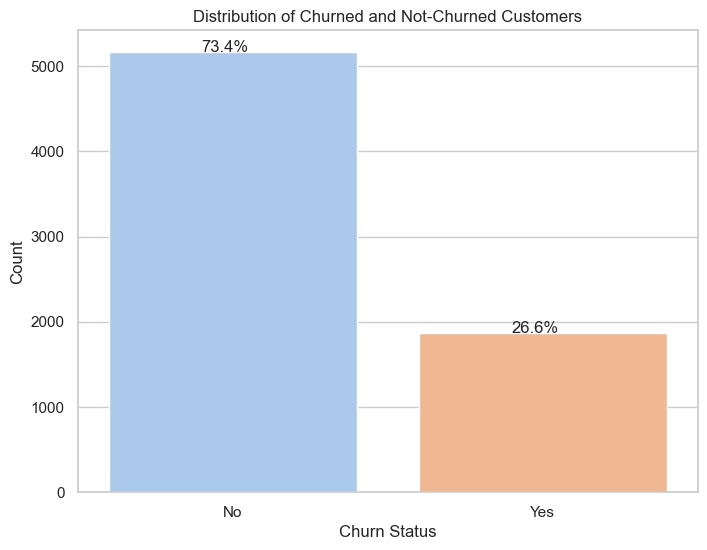

In [12]:
# let's visualise the target variable "churn"

sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))

ax = sns.countplot(x='churn', data=df, palette='pastel')

total = len(df['churn'])
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2 - 0.1
    y = p.get_y() + p.get_height() + 0.02
    ax.annotate(percentage, (x, y), size=12)

plt.title('Distribution of Churned and Not-Churned Customers')
plt.xlabel('Churn Status')
plt.ylabel('Count')

plt.show()


It is clear that among 7043 customers, there are 1869(26.6%) customers who churned and 5163(73.4%) customers retained with the company.From the above graph and the number I got, I can clearly declare that the dataset is imbalanced. So, It must have to be taken into consideration while building predictive model.

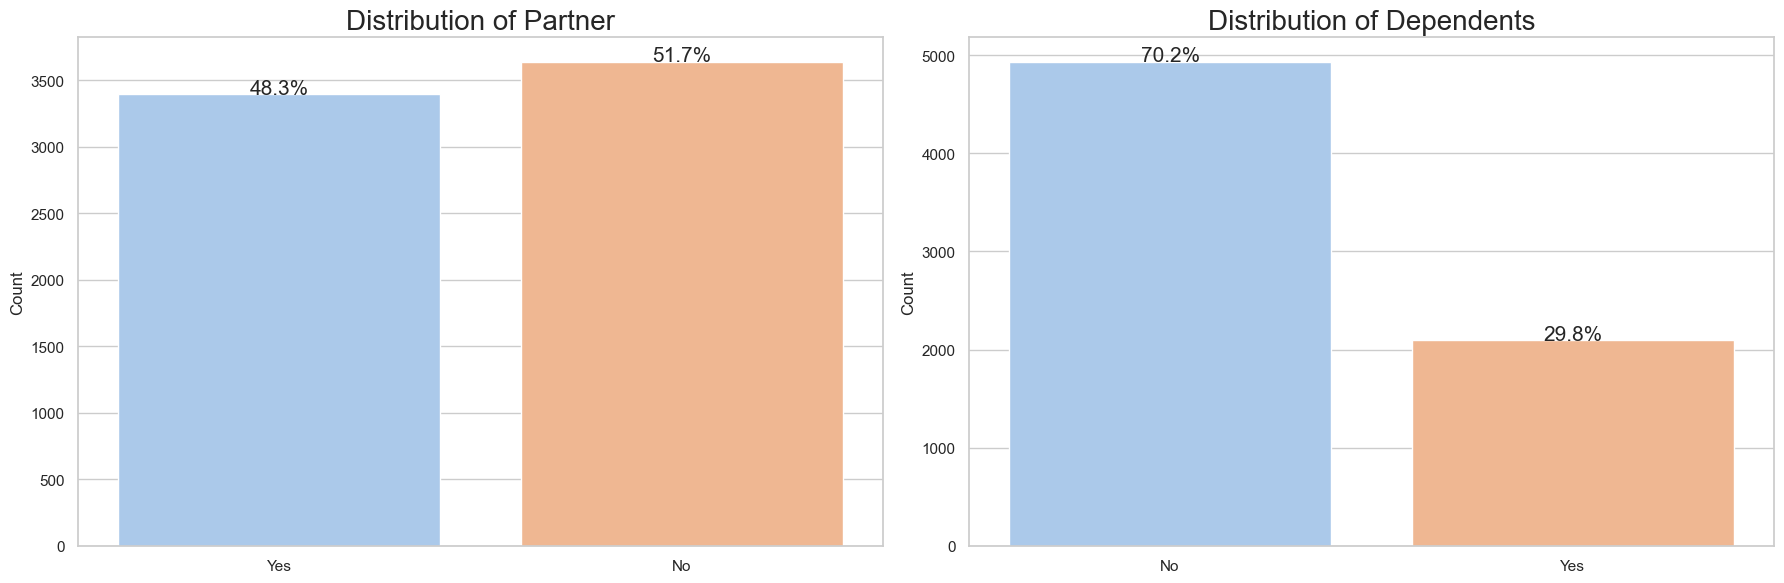

In [13]:
cols = ['partner', 'dependents']

# Set the style for the plot
sns.set(style="whitegrid")

# Create a color palette for better visibility
colors = sns.color_palette("pastel")

plt.figure(figsize=(18, 6))

for i, col in enumerate(cols):
    ax = plt.subplot(1, len(cols), i + 1)
    sns.countplot(x=str(col), data=df, palette=colors) 

    total = len(df[col])
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width() / 2., height + 3, f'{height / total * 100:.1f}%', ha="center", fontsize=15)

    ax.set_title(f"Distribution of {col.capitalize()}", fontsize = 20)
    ax.set_xlabel("",fontsize = 20)  
    ax.set_ylabel("Count")

plt.tight_layout()
plt.show()


It is observed that 51.7% of total customers have partners whereas 48.3% of customers do not have any partners. Only around 30% of the customers have any dependents. 

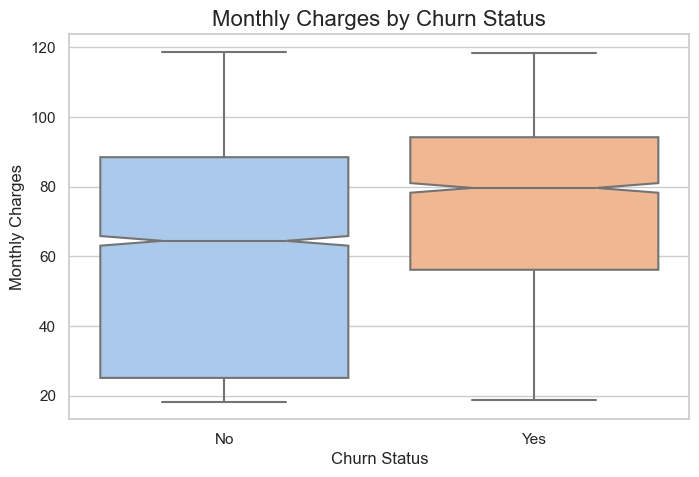

In [14]:
# let’s visualise the graph between cost and customer churn

colors = sns.color_palette("pastel")
plt.figure(figsize=(8, 5))

sns.boxplot(x='churn', y='monthlycharges', data=df, palette=colors, notch=True, showfliers=False)
plt.title('Monthly Charges by Churn Status', fontsize=16)
plt.xlabel('Churn Status', fontsize = 12)
plt.ylabel('Monthly Charges', fontsize = 12)
plt.show()

Here, it is observed that the churned customers are paying higher median monthly charges.

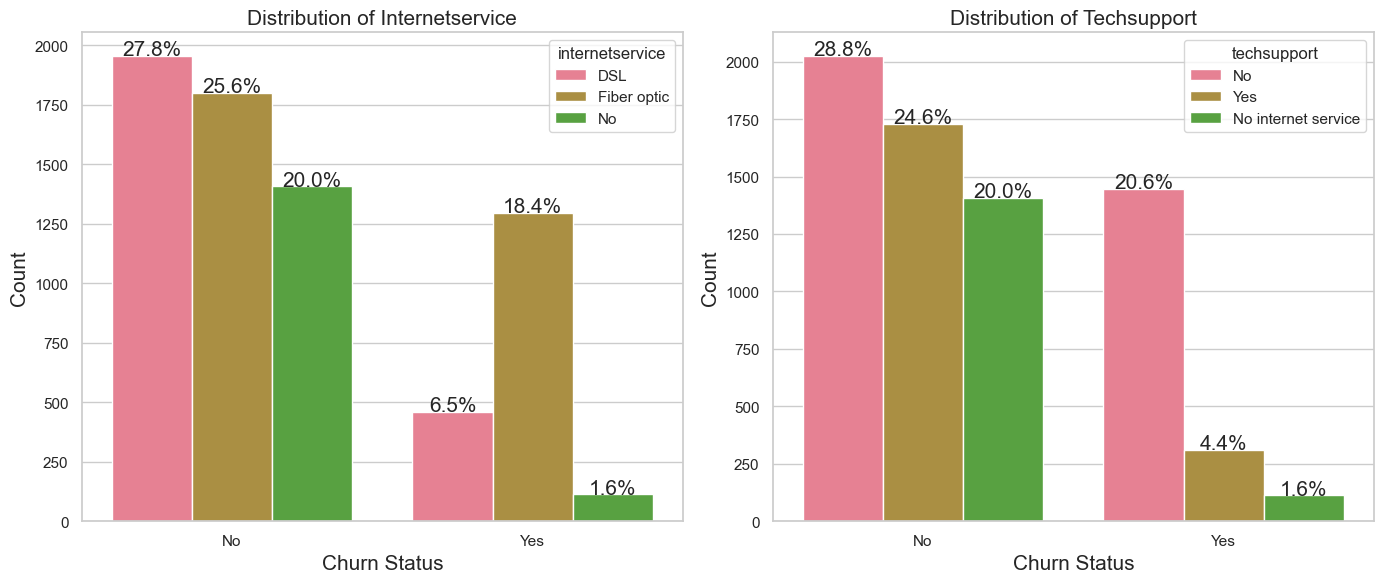

In [15]:
# let's visualise the relationship churn vs internet service and churn vs tech support 
sns.set(style="whitegrid")
colors = sns.color_palette("husl")
plt.figure(figsize=(14, 6))

cols = ['internetservice', 'techsupport']
for i, col in enumerate(cols):
    ax = plt.subplot(1, len(cols), i+1)
    sns.countplot(x = "churn", hue = str(col), data = df, palette = colors)
    total = len(df[col])
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width() / 2., height + 3, f'{height / total * 100:.1f}%', ha="center", fontsize = 15)
    ax.set_title(f"Distribution of {col.capitalize()}", fontsize=15)
    ax.set_xlabel("Churn Status", fontsize=15)
    ax.set_ylabel("Count", fontsize=15)

plt.tight_layout()
plt.show()


from the above bar graph, it is clear that customers who use fiber optic internet churn more often than other users. Similarly, most of the users who churned did not have any technological support.

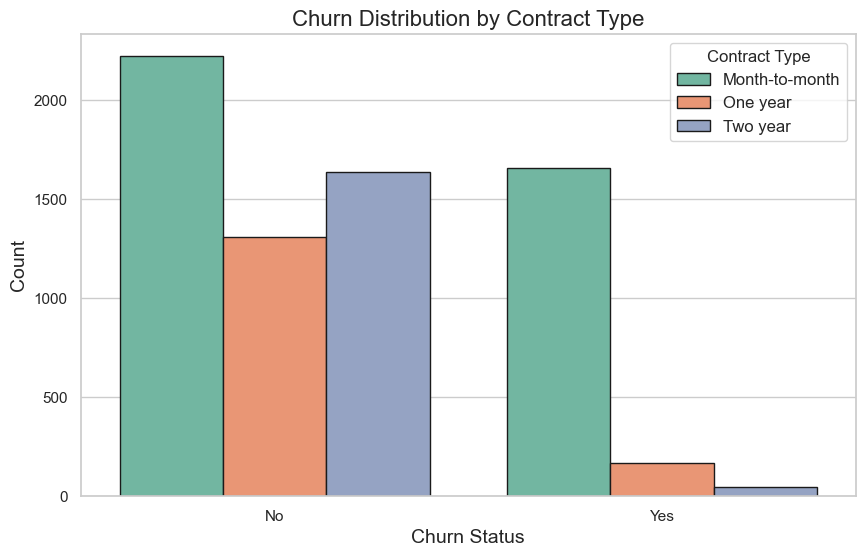

In [16]:
# let's plot the relationship between churn and contract
sns.set(style="whitegrid")
colors = sns.color_palette("Set2")
plt.figure(figsize=(10, 6))

sns.countplot(x="churn", hue="contract", data=df, palette=colors, edgecolor="k")

total = len(df['contract'])
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 3, f'{height / total * 100:.1f}%', ha = "center", fontsize = 15)
plt.title('Churn Distribution by Contract Type', fontsize=16)
plt.xlabel('Churn Status', fontsize=14)
plt.ylabel('Count', fontsize=14)

plt.legend(title='Contract Type', title_fontsize='12', fontsize='12')
plt.show()



Those customers churned mostly who had a month to month contract with the company. Similarly, a big portion of month to month contract customers also retained with the company followed by the one year contract customers.

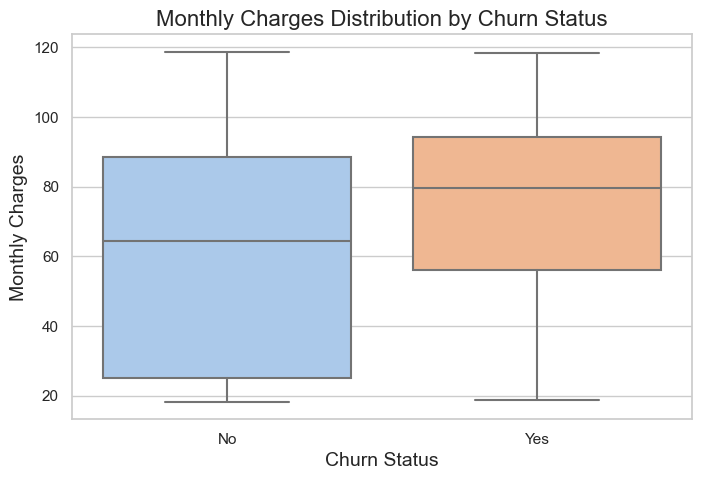

In [17]:
# let's visualise churn by monthly charges
sns.set(style="whitegrid")
plt.figure(figsize=(8, 5))
sns.boxplot(x='churn', y='monthlycharges', data=df, palette='pastel')

plt.title('Monthly Charges Distribution by Churn Status', fontsize=16)
plt.xlabel('Churn Status', fontsize=14)
plt.ylabel('Monthly Charges', fontsize=14)

plt.show()


From the graph, it is clearly observed that median monthly charges were high in terms of churned customers.

# Data Preprocessing

In [18]:
# first check whether there is any missing values

df.isnull().sum()

customerid          0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

No missing values as we dropped the missing values earlier from totalcharges column.

In [19]:
# let's separate the categorical variables

cat_vars = df.drop(['customerid','totalcharges','monthlycharges','seniorcitizen','tenure'],axis=1)


In [20]:
# Encoding the categorical variables

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df_cat_vars = cat_vars.apply(le.fit_transform)
df_cat_vars.head()

,gender,partner,dependents,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,churn
0,0,1,0,0,1,0,0,2,0,0,0,0,0,1,2,0
1,1,0,0,1,0,0,2,0,2,0,0,0,1,0,3,0
2,1,0,0,1,0,0,2,2,0,0,0,0,0,1,3,1
3,1,0,0,0,1,0,2,0,2,2,0,0,1,0,0,0
4,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2,1


All the categorical variables have been encoded using LabelEncoder. LabelEncoder encode the values in alphabetical order. For instance, Gender has two categories (Female and Male). Here, first letter of Female is 'F' and Male is 'M'. 'F' comes before 'M', so LabelEncoder encode the 'F' as 0 and 'M' as 1. 

In [21]:
# Scaling the dataset
from sklearn.preprocessing import StandardScaler

df_num_vars = df[['customerid','totalcharges','monthlycharges','seniorcitizen','tenure']]

ss = StandardScaler() # Standardization

df_num_vars['tenure'] = ss.fit_transform(df_num_vars[['tenure']])
df_num_vars['monthlycharges'] = ss.fit_transform(df_num_vars[['monthlycharges']])
df_num_vars['totalcharges'] = ss.fit_transform(df_num_vars[['totalcharges']])

In [22]:
# Let's merge the encoded categorical variables with other existing numerical variables

final_df = pd.concat([df_num_vars, df_cat_vars], axis = 1)

In [23]:
final_df.head()

,customerid,totalcharges,monthlycharges,seniorcitizen,tenure,gender,partner,dependents,phoneservice,multiplelines,...,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,churn
0,7590-VHVEG,-0.994194,-1.161694,0,-1.280248,0,1,0,0,1,...,0,2,0,0,0,0,0,1,2,0
1,5575-GNVDE,-0.173740,-0.260878,0,0.064303,1,0,0,1,0,...,2,0,2,0,0,0,1,0,3,0
2,3668-QPYBK,-0.959649,-0.363923,0,-1.239504,1,0,0,1,0,...,2,2,0,0,0,0,0,1,3,1
3,7795-CFOCW,-0.195248,-0.747850,0,0.512486,1,0,0,0,1,...,2,0,2,2,0,0,1,0,0,0
4,9237-HQITU,-0.940457,0.196178,0,-1.239504,0,0,0,1,0,...,0,0,0,0,0,0,0,1,2,1


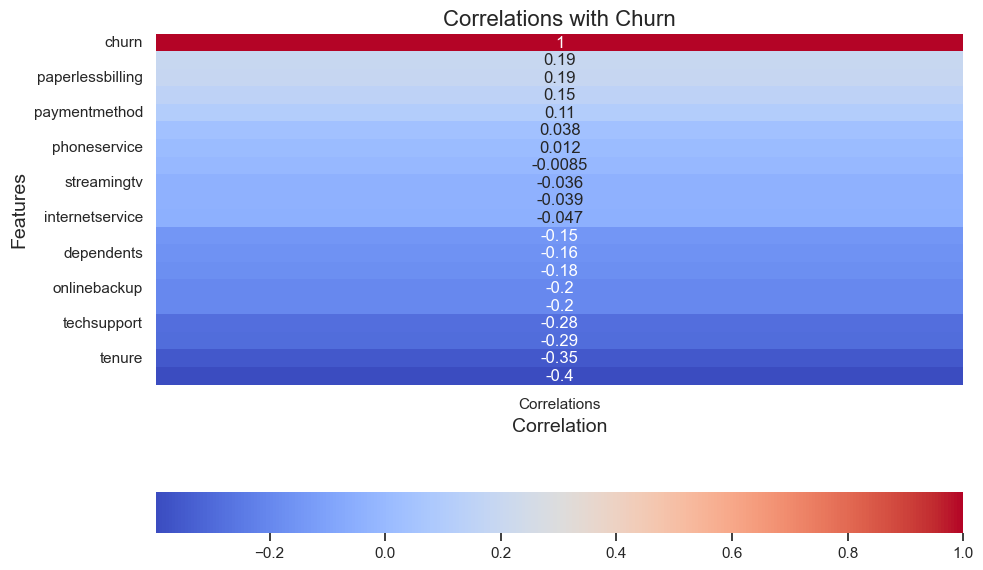

In [24]:
# Correalation matrix 
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

corr = final_df.drop('customerid', axis=1).corrwith(final_df['churn']).sort_values(ascending=False).to_frame()
corr.columns = ['Correlations']

sns.heatmap(corr, annot=True, cmap='coolwarm', cbar_kws={'orientation': 'horizontal', 'pad': 0.2})
plt.title('Correlations with Churn', fontsize=16)
plt.xlabel('Correlation', fontsize=14)
plt.ylabel('Features', fontsize=14)
plt.tight_layout()
plt.show()


In [25]:
corr[(corr['Correlations'] > 0.18) | (corr['Correlations'] <= -0.20)]

,Correlations
churn,1.000000
monthlycharges,0.192858
paperlessbilling,0.191454
techsupport,-0.282232
onlinesecurity,-0.289050
tenure,-0.354049
contract,-0.396150


##### As mentioned earlier, the dataset is imbalanced, which means that a majority of values in the target variable belong to a single class. This class imbalance can lead to an underperforming machine learning model. Some algorithms that train on an imbalanced dataset always end up predicting the majority class. There are several techniques that can be used to overcome the class imbalancement in machine learning. In this project, I will use oversampling technique. I am going to oversample the minority class until the number of data points are equal to that of the majority class. Before oversampling, I splited the dataset into two portions using train-test split. 

In [26]:
# Spliting the dataset

from sklearn.model_selection import train_test_split

# as there are very less number of variables, hence I considered taking all the variables in the model.
# but if there were many variables or the correlation between DV and IV was high (>0.5) then I'd consider a sample of variables

X = final_df.drop(['customerid','churn'], axis = 1)

y = final_df['churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 695121)

In [27]:
# let's oversample the dataset using SMOTE

from imblearn.over_sampling import SMOTE
oversample = SMOTE(random_state = 695121)

X_smote, y_smote = oversample.fit_resample(X_train, y_train)
X_train, y_train = X_smote, y_smote

In [28]:
# let's check the number of observations in each class

y_train.value_counts()

churn
0    3621
1    3621
Name: count, dtype: int64

In [29]:
# Classification Model Building

from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import precision_recall_curve

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier



In [30]:
def model(classifier_model, x_train, y_train, x_test, y_test):
    classifier_model.fit(x_train,y_train)
    prediction = classifier_model.predict(x_test)
    cv = RepeatedStratifiedKFold(n_splits = 5,random_state = 695121)
    cv_score = cross_val_score(classifier_model, x_train, y_train, cv = cv).mean()
    print("Cross Validation Score : ",'{0:.2%}'.format(cv_score))
    

def model_evaluation(classifier_model, x_test, y_test):
    # Confusion Matrix
    conf_mat = confusion_matrix(y_test, classifier_model.predict(x_test))
    ax= plt.subplot()
    sns.heatmap(conf_mat, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation  
    ax.set_xlabel('Predicted labels');
    ax.set_ylabel('True labels'); 
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['Not Churned', 'Churned']); ax.yaxis.set_ticklabels(['Not Churned', 'Churned']);
    print(conf_mat)
    print(classification_report(y_test,classifier_model.predict(x_test)))

Best Hyperparameters: {'C': 1, 'penalty': 'l2'}
Cross Validation Score Check with the best parameters:
[[2656  965]
 [ 580 3041]]
              precision    recall  f1-score   support

           0       0.82      0.73      0.77      3621
           1       0.76      0.84      0.80      3621

    accuracy                           0.79      7242
   macro avg       0.79      0.79      0.79      7242
weighted avg       0.79      0.79      0.79      7242


Model Evaluation on Test Set:
[[1140  402]
 [ 131  437]]
              precision    recall  f1-score   support

           0       0.90      0.74      0.81      1542
           1       0.52      0.77      0.62       568

    accuracy                           0.75      2110
   macro avg       0.71      0.75      0.72      2110
weighted avg       0.80      0.75      0.76      2110



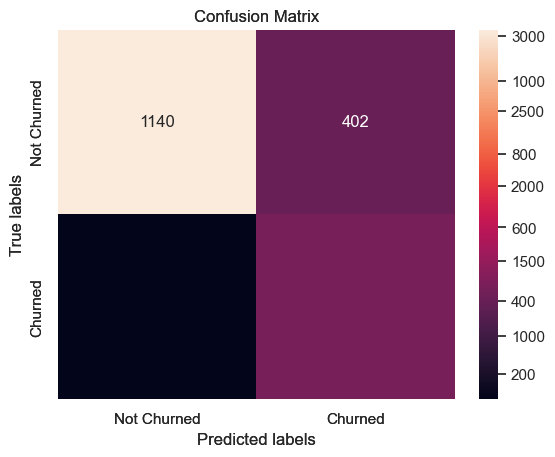

In [31]:
# Create a logistic regression model
log_reg = LogisticRegression(random_state = 695121)

# Define hyperparameters and their possible values
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'penalty': ['l1', 'l2']}

# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(log_reg, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print(f'Best Hyperparameters: {best_params}')

# Train the logistic regression model with the best hyperparameters
best_log_reg = LogisticRegression(**best_params, random_state = 695121)
best_log_reg.fit(X_train, y_train)

# Cross-validation score check
print('Cross Validation Score Check with the best parameters:')
model_evaluation(best_log_reg, X_train, y_train)

# Model Evaluation
print('\nModel Evaluation on Test Set:')
model_evaluation(best_log_reg, X_test, y_test)

Best Hyperparameters: {'criterion': 'entropy', 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2}
Cross Validation Score Check with the best parameters:
[[3580   41]
 [  14 3607]]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      3621
           1       0.99      1.00      0.99      3621

    accuracy                           0.99      7242
   macro avg       0.99      0.99      0.99      7242
weighted avg       0.99      0.99      0.99      7242


Model Evaluation on Test Set:
[[1186  356]
 [ 261  307]]
              precision    recall  f1-score   support

           0       0.82      0.77      0.79      1542
           1       0.46      0.54      0.50       568

    accuracy                           0.71      2110
   macro avg       0.64      0.65      0.65      2110
weighted avg       0.72      0.71      0.71      2110



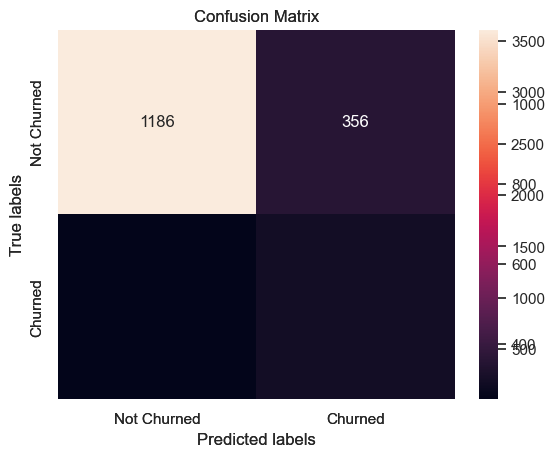

In [32]:
# Create a Decision Tree Classifier model
dt_model = DecisionTreeClassifier(random_state = 695121)

# Define hyperparameters and their possible values
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(dt_model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print(f'Best Hyperparameters: {best_params}')

# Train the Decision Tree Classifier with the best hyperparameters
best_dt_model = DecisionTreeClassifier(**best_params, random_state = 695121)
best_dt_model.fit(X_train, y_train)

# Cross-validation score check
print('Cross Validation Score Check with the best parameters:')
model_evaluation(best_dt_model, X_train, y_train)

# Model Evaluation
print('\nModel Evaluation on Test Set:')
model_evaluation(best_dt_model, X_test, y_test)


## Between Logistic Regression and Decision Tree, Logistic regression works better as the accuracy score is higher than decision tree as well this model successfully identified 437 churned customer whereas decision tree only predicted 307 churned customer.
